# 2020a_4DVARQG
This notebook, associated to the configuration file *config_2020a_4DVARQG.py* runs a BFN-QG experiment to map SSH from simulated SWOT and Nadir data

## Configuration file

In [1]:
path_config = 'config_2020a_4DVARId.py'

In [2]:
import sys
sys.path.append('../..')

In [3]:

from src import exp
config = exp.Exp(path_config)

name_experiment: 2020a_4DVARId
saveoutputs: True
name_exp_save: 2020a_4DVARId
path_save: outputs/2020a_4DVARId
tmp_DA_path: scratch/2020a_4DVARId
init_date: 2012-10-01 00:00:00
final_date: 2012-12-15 00:00:00
assimilation_time_step: 3:00:00
saveoutput_time_step: 6:00:00
flag_plot: 0
name_lon: lon
name_lat: lat
name_time: time
plot_time_step: 1 day, 0:00:00
time_obs_min: None
time_obs_max: None
write_obs: False
compute_obs: False
path_obs: None

NAME_BC is not set in the configuration file


## State

In [4]:
from src import state as state
State = state.State(config)

super: GRID_GEO
lon_min: 295.0
lon_max: 305.0
lat_min: 33.0
lat_max: 43.0
dlon: 0.1
dlat: 0.1
name_init_mask: None
name_var_mask: {'lon': '', 'lat': '', 'var': ''}



## Model

In [5]:
from src import mod as mod
Model = mod.Model(config,State)

super: MOD_DIFF
name_var: {'SSH': 'ssh'}
var_to_save: None
name_init_var: {}
dtmodel: 3600
Kdiffus: 0
init_from_bc: False



## Observations

In [7]:
from src import obs as obs
dict_obs = obs.Obs(config,State)

Observation information will be saved in dict_obs_J1_EN_TPN_G2_20121001_20121215_295_305_33_43.txt

J1:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_jason1.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var_mdt: None
nudging_params_ssh: None
detrend: False

--> 92 tracks selected

EN:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_envisat.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var_mdt: None
nudging_params_ssh: None
detrend: False

--> 79 tracks selected

TPN:
super: OBS_SSH_NADIR
path: data/dc_obs/2020a_SSH_mapping_NATL60_topex-poseidon_interleaved.nc
name_time: time
name_lon: lon
name_lat: lat
name_var: {'SSH': 'ssh_model'}
varmax: 100.0
sigma_noise: None
add_mdt: None
substract_mdt: None
path_mdt: None
name_var

In [8]:
from src import obsop as obsop
Obsop = obsop.Obsop(config,State,dict_obs,Model)

super: OBSOP_INTERP
path_save: None
compute_op: False
Npix: 4
mask_coast: False
dist_coast: 100
mask_borders: False



## Reduced Basis

In [9]:
from src import basis as basis
Basis = basis.Basis(config,State)

super: BASIS_BM
name_mod_var: ssh
wavelet_init: False
flux: True
save_wave_basis: inline
facns: 1.0
facnlt: 2.0
npsp: 3.5
facpsp: 1.5
lmin: 80
lmax: 970.0
lmeso: 300
tmeso: 10
sloptdec: -1
factdec: 1
tdecmin: 0.0
tdecmax: 15.0
facQ: 1
Qmax: 0.03
slopQ: -2
path_background: None
var_background: None



## Assimilation

In [10]:
from src import inv as inv
inv.Inv(config,State,Model,dict_obs=dict_obs,Obsop=Obsop,Basis=Basis,Bc=Bc)

super: INV_4DVAR
compute_test: False
path_init_4Dvar: None
restart_4Dvar: False
gtol: 1e-05
maxiter: 200
opt_method: L-BFGS-B
save_minimization: False
timestep_checkpoint: 6:00:00
sigma_R: 0.01
sigma_B: None
prec: True
prescribe_background: False
bkg_satellite: None
path_background: None
bkg_Kdiffus: 0.0
name_bkg_var: res
bkg_maxiter: 30
bkg_maxiter_inner: 10
largescale_error_ratio: 1
only_largescale: False
anomaly_from_bc: False

--> 410 checkpoints to evaluate the cost function
lambda=9.7E+02 nlocs=4.0E+00 tdec=1.5E+01 Q=2.1E-02
lambda=6.8E+02 nlocs=4.0E+00 tdec=1.5E+01 Q=2.1E-02
lambda=4.8E+02 nlocs=8.0E+00 tdec=1.5E+01 Q=2.1E-02
lambda=3.3E+02 nlocs=9.0E+00 tdec=1.1E+01 Q=2.1E-02
lambda=2.3E+02 nlocs=1.5E+01 tdec=7.8E+00 Q=1.3E-02
lambda=1.6E+02 nlocs=2.3E+01 tdec=5.4E+00 Q=6.3E-03
lambda=1.1E+02 nlocs=4.2E+01 tdec=3.8E+00 Q=3.1E-03
lambda=8.0E+01 nlocs=7.0E+01 tdec=2.7E+00 Q=1.5E-03
reduced order: 3131604 --> 130500
 reduced factor: 23

*** Minimization ***

RUNNING THE L-BFGS-B C

 This problem is unconstrained.



At iterate    1    f=  5.00042D+07    |proj g|=  6.00004D+05

At iterate    2    f=  2.49067D+07    |proj g|=  2.78087D+05

At iterate    3    f=  1.49945D+07    |proj g|=  1.83703D+05

At iterate    4    f=  1.36472D+07    |proj g|=  5.90777D+05

At iterate    5    f=  9.87118D+06    |proj g|=  8.25248D+04

At iterate    6    f=  9.36138D+06    |proj g|=  6.24374D+04

At iterate    7    f=  7.81015D+06    |proj g|=  9.11821D+04

At iterate    8    f=  7.27301D+06    |proj g|=  1.20502D+05

At iterate    9    f=  6.79831D+06    |proj g|=  5.82411D+04

At iterate   10    f=  6.24520D+06    |proj g|=  5.56219D+04

At iterate   11    f=  5.83279D+06    |proj g|=  6.67867D+04

At iterate   12    f=  5.43802D+06    |proj g|=  4.68140D+04

At iterate   13    f=  5.16415D+06    |proj g|=  3.32024D+04

At iterate   14    f=  4.96049D+06    |proj g|=  3.60008D+04

At iterate   15    f=  4.75181D+06    |proj g|=  3.17319D+04

At iterate   16    f=  4.46805D+06    |proj g|=  6.37776D+04

At iter

## Diagnostics

In [6]:
from src import diag as diag
Diag = diag.Diag(config,State)

super: DIAG_OSSE
dir_output: diags/2020a_4DVARId
time_min: 2012-10-22 00:00:00
time_max: 2012-12-04 00:00:00
lon_min: None
lon_max: None
lat_min: None
lat_max: None
name_ref: data/dc_ref/NATL60-CJM165_GULFSTREAM*.nc
name_ref_time: time
name_ref_lon: lon
name_ref_lat: lat
name_ref_var: sossheig
options_ref: {'combine': 'nested', 'concat_dim': 'time', 'parallel': True}
name_exp_var: ssh
compare_to_baseline: True
name_bas: data/2020a_SSH_mapping_NATL60_DUACS_en_j1_tpn_g2.nc
name_bas_time: time
name_bas_lon: lon
name_bas_lat: lat
name_bas_var: gssh



In [7]:
Diag.regrid_exp()

In [9]:
Diag.rmse_based_scores(plot=True)

/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(
/home/fleguillou/anaconda3/envs/massh/lib/python3.10/site-packages/xrft/xrft.py:47: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  warnings.warn(


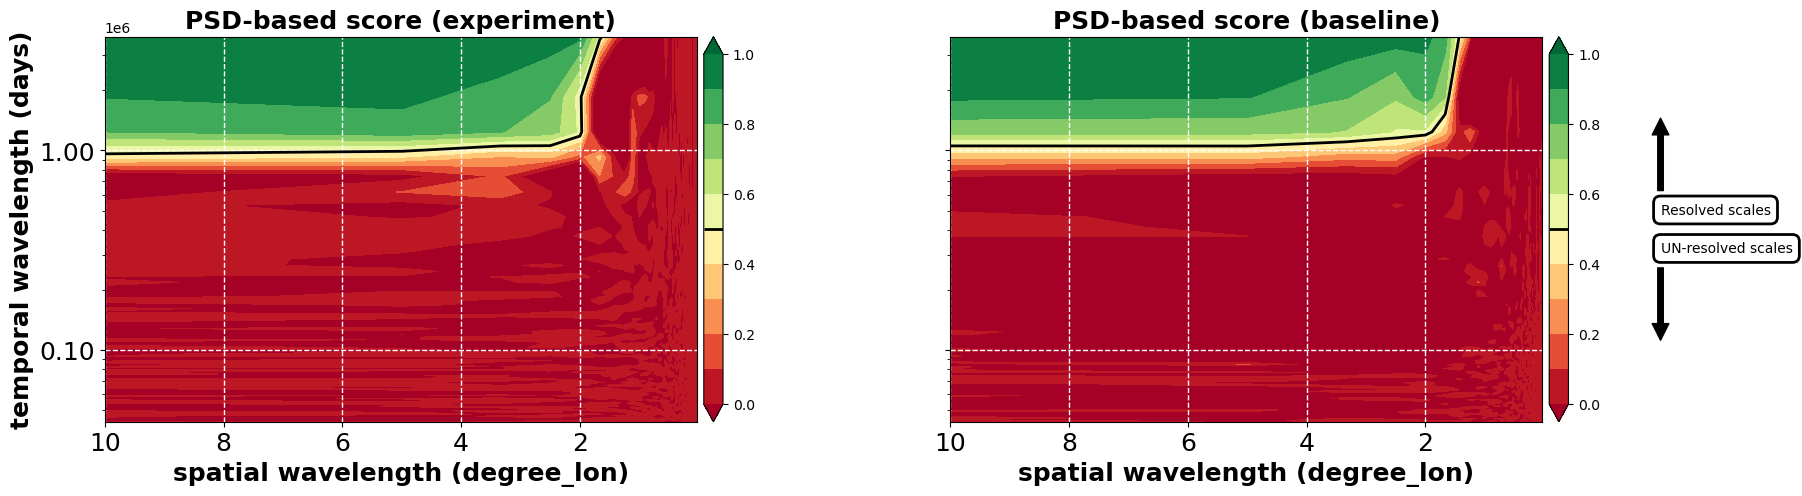

In [14]:
Diag.psd_based_scores(plot=True)

In [10]:
Diag.movie(framerate=12)

ffmpeg -f image2 -r 12 -pattern_type glob -i diags/2020a_4DVARId/frame_*.png -y -c:v libx264 -preset veryslow -crf 15 -pix_fmt yuv420p -r 12 diags/2020a_4DVARId/movie.mp4


ffmpeg version 4.3.2 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 10.3.0 (GCC)
  configuration: --prefix=/home/fleguillou/anaconda3/envs/env-plot --cc=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/x86_64-conda-linux-gnu-cc --disable-doc --disable-openssl --enable-avresample --enable-gnutls --enable-gpl --enable-hardcoded-tables --enable-libfreetype --enable-libopenh264 --enable-libx264 --enable-pic --enable-pthreads --enable-shared --disable-static --enable-version3 --enable-zlib --enable-libmp3lame --pkg-config=/home/conda/feedstock_root/build_artifacts/ffmpeg_1645955405450/_build_env/bin/pkg-config
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libavresample   4.  0.  0 /  4.  0.  0
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
  libpostproc

In [11]:
import os
from IPython.display import Video
Video(os.path.join(Diag.dir_output, 'movie.mp4'))

In [17]:
Leaderboard = Diag.Leaderboard()
Leaderboard

,Method,µ(RMSE),σ(RMSE),λx (degree),λt (days)
0,2020a_4DVARId,0.91,0.01,1.63,11.13
1,baseline,0.92,0.01,1.43,12.18
